In [1]:
import pandas as pd
import numpy as np
import os
import mne
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from preprocessing import *

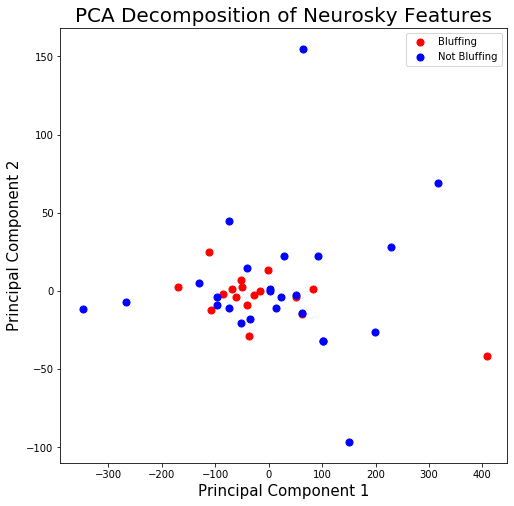

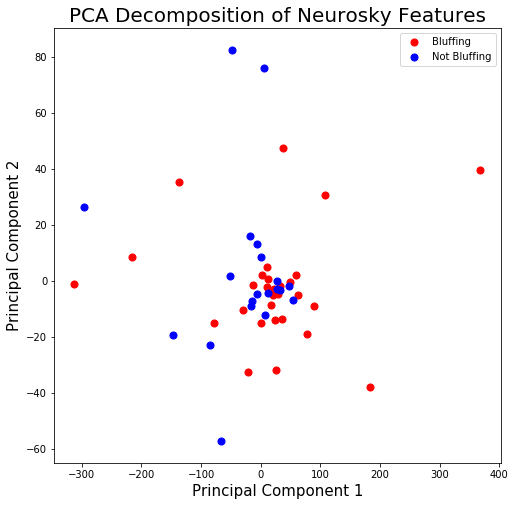

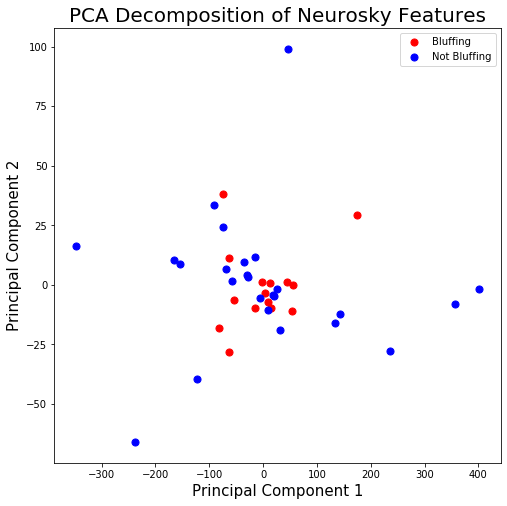

In [2]:
events = extract_events(np.array(recordings[0]['event_stream']))

# subject 1: Adrianna, subject 2: Lucas, subject 3: Allen
epochs = [create_epochs(recording) for recording in recordings[1:]]
epochs = [mne.concatenate_epochs(epochs[:3]), epochs[3], epochs[4]]

for ind, epoch in enumerate(epochs):
    X, Y = get_features(epoch, bins = 1)
    pca = PCA(n_components=2)
    X_t = pca.fit_transform(X)
    plot_pca(X_t*10**12, Y, save = f'./pca_sub{ind}.png')

In [76]:
X, Y = get_features(mne.concatenate_epochs(epochs), bins = 2)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .3)

#clf = SVC(kernel='linear')
clf = SVC(kernel='rbf', gamma='auto')
clf.fit(X_train, y_train)
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
print(f'training accuracy : {train_acc}, testing accuracy: {test_acc}')

training accuracy : 1.0, testing accuracy: 0.5121951219512195


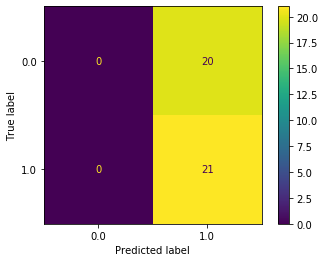

In [78]:
plot_confusion_matrix(clf, X_test, y_test)
plt.savefig('SVM.png', dpi = 300)

training accuracy : 0.8387096774193549, testing accuracy: 0.2727272727272727
training accuracy : 0.8717948717948718, testing accuracy: 0.6923076923076923
training accuracy : 0.9333333333333333, testing accuracy: 0.9


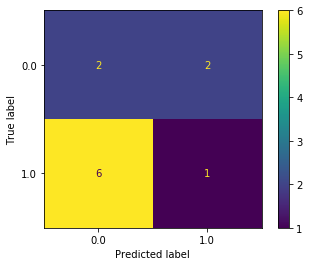

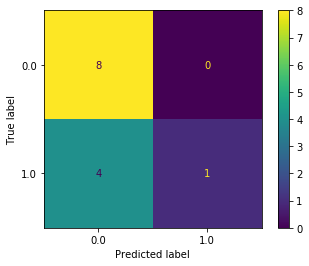

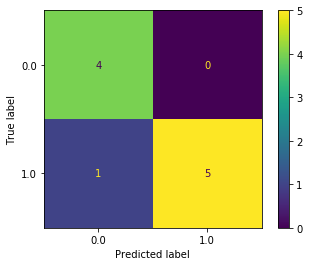

In [89]:
for ind, epoch in enumerate(epochs):
    X, Y = get_features(epoch, bins = 4)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .25)
    
    clf = SVC(kernel='rbf', gamma='scale', C = 10)
    clf.fit(X_train, y_train)
    
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    print(f'training accuracy : {train_acc}, testing accuracy: {test_acc}')
    
    plot_confusion_matrix(clf, X_test, y_test)
    plt.savefig(f'SVM_{ind}.png', dpi = 300)

In [90]:
epochs

[<Epochs  |   74 events (all good), -4 - 4 sec, baseline [None, 0], ~492 kB, data loaded,
  'bluffing': 17
  'call': 29
  'no_call': 3
  'not_bluffing': 25>,
 <Epochs  |   81 events (all good), -4 - 4 sec, baseline [None, 0], ~536 kB, data loaded,
  'bluffing': 32
  'call': 16
  'no_call': 13
  'not_bluffing': 20>,
 <Epochs  |   88 events (all good), -4 - 4 sec, baseline [None, 0], ~581 kB, data loaded,
  'bluffing': 15
  'call': 32
  'no_call': 16
  'not_bluffing': 25>]